In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.fft import rfft, rfftfreq, irfft
import mogptk

In [12]:
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x+np.pi/10)**2+np.cos(4*np.pi*x)

In [13]:
x=np.linspace(0,1,800)
ground_truth=[high_fidelity(i) for i in x]

In [14]:
model=mogptk.LoadModel("1experiment")
_,real,_,_=model.predict(x)

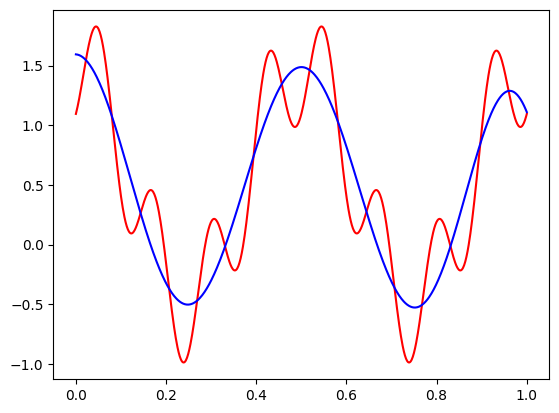

In [15]:
plt.plot(x,ground_truth, c="r")
plt.plot(x,real, c="b")

In [3]:
def high_fidelity(x):
    low_freq= np.sin(np.pi*x)+2*np.sin(2*np.pi*x)+ np.sin(3*np.pi*x)
    high_freq=np.sin(7*np.pi*x)+2*np.sin(8*np.pi*x)+ np.sin(9*np.pi*x)
    return low_freq+high_freq

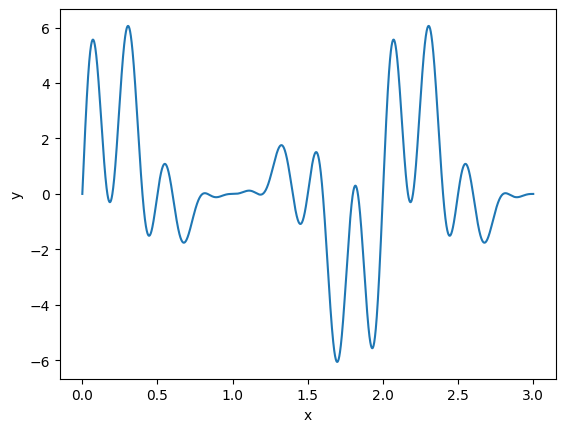

In [9]:
x=np.linspace(0,3,3200)
points=[high_fidelity(i) for i in x]
import matplotlib.pyplot as plt
plt.plot(x,points)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("1experiment_ground_truth.jpeg")

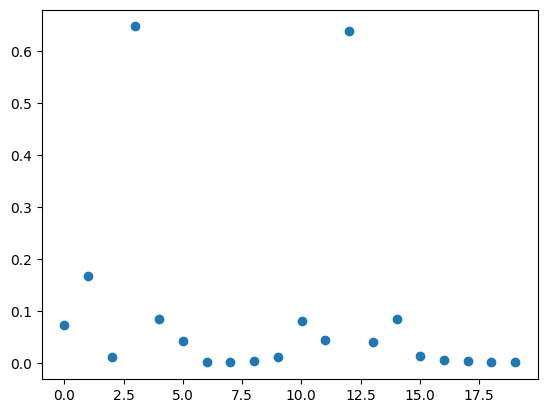

In [10]:
from numpy.fft import rfft
freqs= rfft(points)/4001
x1=np.linspace(0,751,751)
plt.scatter(x1[:20], (np.abs(freqs)**2)[:20])

In [11]:
model=mogptk.LoadModel("1experiment")
_,real,_,_=model.predict(x)

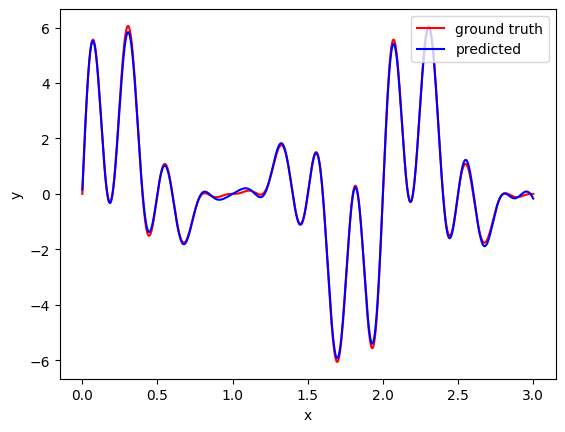

In [12]:
plt.plot(x,points, c="r",label="ground truth")
plt.plot(x,real, c="b" ,label="predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.savefig("1experiment.jpeg")


In [13]:
for i in model.parameters():
    print(i)

IndependentMultiOutputKernel[0].SpectralMixtureKernel.magnitude=[3.0226989943804976, 1.17273144020909, 1.1475227427583465e-07, 1.1475227427583465e-07, 1.1475227427583465e-07, 1.1475227427583465e-07, 1.1475227427583465e-07, 1.1475227427583465e-07, 1.1475227427583465e-07, 1.1475227427583465e-07, 1.1475227427583465e-07, 1.1475227427583465e-07, 1.1475227427583465e-07, 1.1475227427583465e-07, 1.1475227427583465e-07]
IndependentMultiOutputKernel[0].SpectralMixtureKernel.mean=[[4.00304306076406], [0.9679499719868984], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08], [1e-08]]
IndependentMultiOutputKernel[0].SpectralMixtureKernel.variance=[[0.043710499122093904], [0.13078005880158133], [1.1999988009118239e-07], [1.1999988009118239e-07], [1.1999988009118239e-07], [1.1999988009118239e-07], [1.1999988009118239e-07], [1.1999988009118239e-07], [1.1999988009118239e-07], [1.1999988009118239e-07], [1.1999988009118239e-07], [1.1999988009118239e-

In [14]:
np.max(np.abs(points-real))

0.23112256343281423